<a href="https://colab.research.google.com/github/steed360/3D-Graphics/blob/master/Investigate_Plot_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TODO*
-  ... With labels for (unknown unknown etc)
-  Bring in the "real" data 
-  Do half violins.

DONE 
- CIs
-  Add SWD Theme etc/
-  Add a box around the different sections 
 

In [133]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import transforms
import matplotlib


import pandas as pd
import pandas.api.types as pdtypes # for (sorted) categories.

import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine

%matplotlib inline


from  mizani import formatters # for better axis labelling

from matplotlib.ticker import FixedLocator, FixedFormatter

from matplotlib.patches import Rectangle


In [14]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [15]:
np.repeat ( 3,1 )

array([3])

In [16]:
np.random.seed(123)
n = 20
mu = (10, 10)
sigma = (1, 3.6)

point_estimate = np.repeat ( 5,1)
before = np.random.normal(loc=mu[0], scale=sigma[0], size=n)
after  = np.random.normal(loc=mu[1], scale=sigma[1], size=n)

point_estimate_when  = np.repeat ( 'point\nestimate',1)
before_when   = np.repeat ( 'before', n)
after_when  = np.repeat ( 'after', n)


print ( np.percentile ( before, [5,95]) )

df = pd.DataFrame({
    
    'value':  np.hstack([point_estimate, before, after] )  ,
    'when':   np.hstack ( [point_estimate_when, before_when, after_when]),
    #'when':   np.repeat( [ 'before', 'after'], n),
})

df['when'] = df['when'].astype(pdtypes.CategoricalDtype(categories=['point\nestimate', 'before', 'after', 'other']))
df.head()

[ 8.44768606 12.18774329]


,value,when
0,5.000000,point\nestimate
1,8.914369,before
2,10.997345,before
3,10.282978,before
4,8.493705,before


In [17]:
# DataFrame for the summary information about the distributions.

df_sum = pd.DataFrame ( 
   {
       'when' : ['before', 'before', 'after', 'after', 'other'],
       'vals' : [7,9, 6,11, 5 ],
      
   }
) 


df_sum




,when,vals
0,before,7
1,before,9
2,after,6
3,after,11
4,other,5


In [127]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [23]:
def SWD_theme ():

    # Basic information from the 
    
    font = "Arial"
    t=theme_minimal(base_size = 10, base_family = font ) 

    t2 = theme(
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),

      axis_line = element_line(size = .1, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),

      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
        
      axis_title = element_text(color = GRAY3),

      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),

      plot_title = element_text(color = GRAY4, size= 12 ),
        
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
        
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",

      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),  
        
      strip_text = element_text(color = GRAY7)) 
    
    return t+ t2

In [124]:
# empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

In [ ]:
'''
*TODO*
-  ... With labels for (unknown unknown etc)
-  Bring in the "real" data 
-  Do half violins.

DONE 
- CIs
-  Add SWD Theme etc/
-  Add a box around the different sections 

'''

In [227]:
aes( y='vals',stage= stage('when', after_scale='x+shift_point*x' ) )              # shift outward



{'y': 'vals',
 'stage': stage(start='when', after_stat=None, after_scale='x+shift_point*x')}

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:151: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.


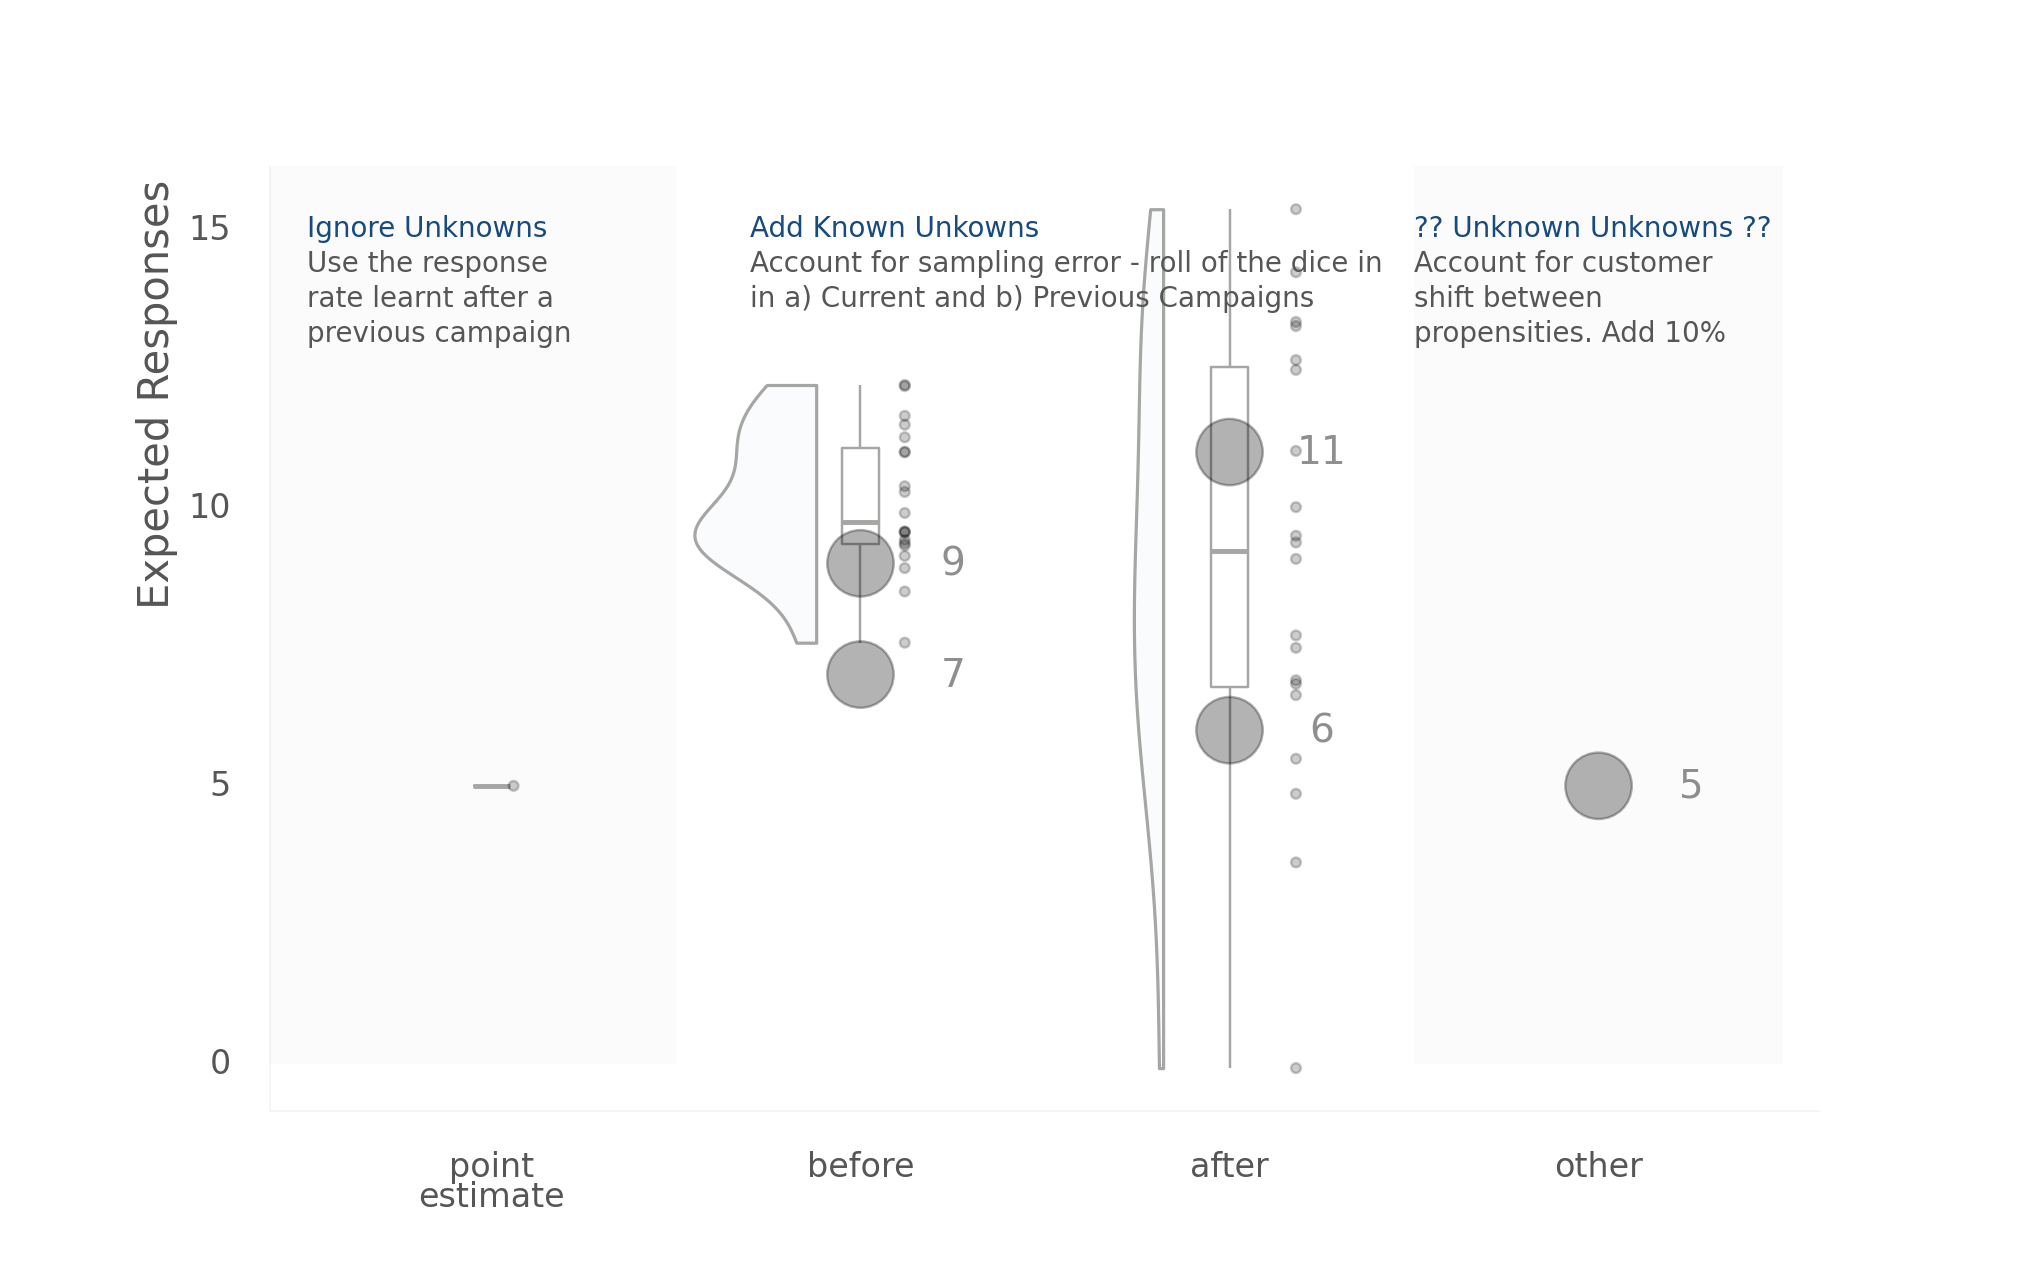

In [232]:
t = theme(         
   
          # Overrides
          axis_title_y = element_text(angle = 90, va = 'bottom', ha = 'left', size = 15, color = GRAY3, y = 0.52),
          panel_grid_major_y=element_blank()
   
)

lsize = 0.65

shift = -0.06
shift_point = 0.06

# For shifting the violin plot
def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    #return (-1) ** x 
    return 

m1 = aes(x=stage('when', after_scale='x+shift*x'))              # shift outward
m2 = aes(x=stage('when', after_scale='x+shift_point*x'))              # shift outward
m3 = aes( stage('when', after_scale='x+shift_point*x' ),y='vals' )              # shift outward



fig = \
(ggplot(df, aes('when', 'value'))
 + geom_violin(m1, alpha=0.04, color=GRAY8, fill=BLUE3, style="left", size=lsize) 
 + geom_boxplot( width=0.1, alpha=0.09, color=GRAY8  )
 + geom_point(m2, alpha=0.2)
  + geom_point ( aes(y='vals' ),data=df_sum , size=13, alpha=0.3)
#  + geom_point ( m3,  data=df_sum , size=13, alpha=0.3)
  + geom_text( data=df_sum, mapping=aes(label = ( 'vals') ,y  = 'vals' )  ,
            #position = position_stack(vjust = .5),
            #format_string="CI:{}",  
            color = GRAY1, size = 14  , alpha=0.5, nudge_x=0.25)  
  + SWD_theme() + t
  + labs(y = "Expected Responses"  , x = "")
  
).draw(show=False, return_ggplot=False) 

# Having got the plot make some other annotations.
ax1 = fig.axes[0]

# Rectangle for forecast
#ax1.add_patch(Rectangle((2015, 5), 10, -20, facecolor=GRAY7))

ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

ax1.add_patch(Rectangle( (-1, 0  ),  2.5, 20, facecolor=GRAY9,alpha=0.05)  )
#ax1.add_patch(Rectangle( (1.5, 0 ),  2, 20, facecolor=ORANGE3,alpha=0.05) )
ax1.add_patch(Rectangle( (3.5,0 ),  1, 20, facecolor=GRAY9,alpha=0.05) )

# Columns Annotations

#annotation_text = "2 employees quit in May. We nearly kept up with incoming calls \n" 
#ax1.annotate(annotation_text,xy=(1,5),xytext=(1,10),color=BLUE2,fontsize=12)

label_y = 13

#$\\mathit{OK}$
rainbow_text(0.5, label_y,
             'Ignore Unknowns\n'
             'Use the response\n'
             'rate learnt after a\n'
             'previous campaign',
             [[BLUE1], [GRAY3], [GRAY3], [GRAY3] ],
             spacing=35,
             ax=ax1,
             fontsize=10)

rainbow_text(1.7, label_y,
             'Add Known Unkowns\n'
             'Account for sampling error - roll of the dice in \n'
             'in a) Current and b) Previous Campaigns \n'
             '',
             [[BLUE1], [GRAY3], [GRAY3], [GRAY3] ],
             spacing=35,
             ax=ax1,
             fontsize=10)

rainbow_text(3.5, label_y,
             '?? Unknown Unknowns ??\n'
             'Account for customer\n'
             'shift between  \n'
             'propensities. Add 10%',
             [[BLUE1], [GRAY3], [GRAY3], [GRAY3] ],
             spacing=35,
             ax=ax1,
             fontsize=10)


fig.dpi = 200
width_in = 10
fig.set_size_inches(width_in , width_in / 1.63) 
